In [1]:
import pandas as pd
tweets = pd.read_csv("data_tweets_with_valence.csv")
tweets = tweets.dropna(axis = 0, subset=['user_location'])
tweets2 = tweets.groupby("user_location").count()
tweets2 = tweets2[tweets2["id"]>100]

usa_tweets = pd.concat([tweets[tweets["user_location"]=="Atlanta, GA"], tweets[tweets["user_location"]=="California, USA"],
                        tweets[tweets["user_location"]=="California, United States"],tweets[tweets["user_location"]=="Chicago, IL"], 
                        tweets[tweets["user_location"]=="Houston, TX"], tweets[tweets["user_location"]=="Los Angeles, CA"], 
                        tweets[tweets["user_location"]=="New York, NY"], tweets[tweets["user_location"]=="New York, USA"], 
                        tweets[tweets["user_location"]=="USA"], tweets[tweets["user_location"]=="United States"], tweets[tweets["user_location"]=="Washington, DC"]])
usa_tweets_positive = len(usa_tweets[usa_tweets["nltk_sentiments"] == "Positive"])/len(usa_tweets)
usa_tweets_negative = len(usa_tweets[usa_tweets["nltk_sentiments"] == "Negative"])/len(usa_tweets)
usa_tweets_neutral = len(usa_tweets[usa_tweets["nltk_sentiments"] == "Neutral"])/len(usa_tweets)
print("usa_tweets_positive:", usa_tweets_positive, 
      "usa_tweets_negative:", usa_tweets_negative, 
      "usa_tweets_neutral:", usa_tweets_neutral)
 
china_tweets = pd.concat([tweets[tweets["user_location"]=="Beijing"], tweets[tweets["user_location"]=="Beijing, China"], tweets[tweets["user_location"]=="Hong Kong"], 
                          tweets[tweets["user_location"]=="Beijing"]])
china_tweets_positive = len(china_tweets[china_tweets["nltk_sentiments"] == "Positive"])/len(china_tweets)
china_tweets_negative = len(china_tweets[china_tweets["nltk_sentiments"] == "Negative"])/len(china_tweets)
china_tweets_neutral = len(china_tweets[china_tweets["nltk_sentiments"] == "Neutral"])/len(china_tweets)
print("china_tweets_positive:", china_tweets_positive, 
      "china_tweets_negative:", china_tweets_negative, 
      "china_tweets_neutral:", china_tweets_neutral)

europe_tweets = pd.concat([tweets[tweets["user_location"]=="Englang, United Kingdom"], tweets[tweets["user_location"]=="France"], 
                           tweets[tweets["user_location"]=="London"], tweets[tweets["user_location"]=="London, England"], tweets[tweets["user_location"]=="UK"], 
                           tweets[tweets["user_location"]=="United Kingdom"]])
europe_tweets_positive = len(europe_tweets[europe_tweets["nltk_sentiments"] == "Positive"])/len(europe_tweets)
europe_tweets_negative = len(europe_tweets[europe_tweets["nltk_sentiments"] == "Negative"])/len(europe_tweets)
europe_tweets_neutral = len(europe_tweets[europe_tweets["nltk_sentiments"] == "Neutral"])/len(europe_tweets)
print("europe_tweets_positive:", europe_tweets_positive, 
      "europe_tweets_negative:", europe_tweets_negative, 
      "europe_tweets_neutral:", europe_tweets_neutral)

india_tweets = pd.concat([tweets[tweets["user_location"]=="Bengaluru, India"], tweets[tweets["user_location"]=="Chennai, India"],
                        tweets[tweets["user_location"]=="Delhi"],tweets[tweets["user_location"]=="Hyderabad, India"], 
                        tweets[tweets["user_location"]=="India"], tweets[tweets["user_location"]=="Mumbai"], 
                        tweets[tweets["user_location"]=="Mumbai, India"], tweets[tweets["user_location"]=="New Delhi"], 
                        tweets[tweets["user_location"]=="New Delhi, India"]])
india_tweets_positive = len(india_tweets[india_tweets["nltk_sentiments"] == "Positive"])/len(india_tweets)
india_tweets_negative = len(india_tweets[india_tweets["nltk_sentiments"] == "Negative"])/len(india_tweets)
india_tweets_neutral = len(india_tweets[india_tweets["nltk_sentiments"] == "Neutral"])/len(india_tweets)
print("india_tweets_positive:", india_tweets_positive, 
      "india_tweets_negative:", india_tweets_negative, 
      "india_tweets_neutral:", india_tweets_neutral)

print("# of vaccine related tweets from users located in US:", len(usa_tweets))
print("# of vaccine related tweets from users located in China:", len(china_tweets))
print("# of vaccine related tweets from users located in Europe:", len(europe_tweets))
print("# of vaccine related tweets from users located in India:", len(india_tweets))

usa_tweets_positive: 0.3907721280602637 usa_tweets_negative: 0.2024482109227872 usa_tweets_neutral: 0.4067796610169492
china_tweets_positive: 0.2518277822908205 china_tweets_negative: 0.07067424857839155 china_tweets_neutral: 0.677497969130788
europe_tweets_positive: 0.41543026706231456 europe_tweets_negative: 0.20252225519287834 europe_tweets_neutral: 0.38204747774480713
india_tweets_positive: 0.34853518574448805 india_tweets_negative: 0.15977046209604348 india_tweets_neutral: 0.49169435215946844
# of vaccine related tweets from users located in US: 2124
# of vaccine related tweets from users located in China: 1231
# of vaccine related tweets from users located in Europe: 1348
# of vaccine related tweets from users located in India: 3311


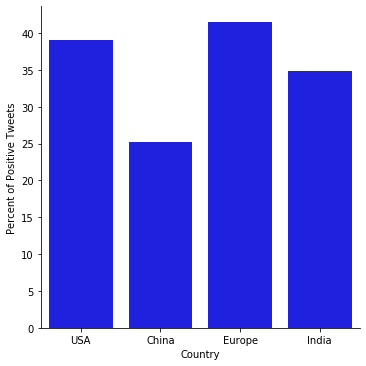

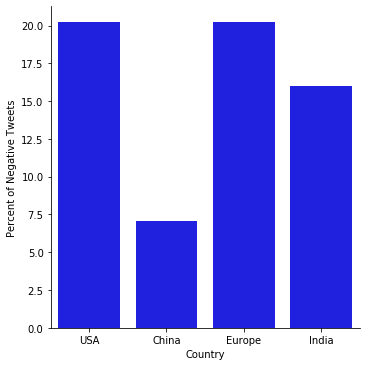

In [4]:
import seaborn as sns
positive_tweets = pd.DataFrame(data = [usa_tweets_positive, china_tweets_positive, europe_tweets_positive, india_tweets_positive], columns = ["Percent of Positive Tweets"])
positive_tweets["Country"] = ["USA", "China", "Europe", "India"]
positive_tweets["Percent of Positive Tweets"] = 100*positive_tweets["Percent of Positive Tweets"]
sns.catplot(data=positive_tweets, x = "Country", y='Percent of Positive Tweets', kind='bar', color='blue')

negative_tweets = pd.DataFrame(data = [usa_tweets_negative, china_tweets_negative, europe_tweets_negative, india_tweets_negative], columns = ["Percent of Negative Tweets"])
negative_tweets["Country"] = ["USA", "China", "Europe", "India"]
negative_tweets["Percent of Negative Tweets"] = 100*negative_tweets["Percent of Negative Tweets"]
sns.catplot(data=negative_tweets, x = "Country", y='Percent of Negative Tweets', kind='bar', color='blue')

neutral_tweets = pd.DataFrame(data = [usa_tweets_neutral, china_tweets_neutral, europe_tweets_neutral, india_tweets_neutral], columns = ["Percent of Neutral Tweets"])
neutral_tweets["Country"] = ["USA", "China", "Europe", "India"]
neutral_tweets["Percent of Neutral Tweets"] = 100*neutral_tweets["Percent of Neutral Tweets"]
sns.catplot(data=neutral_tweets, x = "Country", y='Percent of Neutral Tweets', kind='bar', color='blue')

In [5]:
usa_tweets = pd.DataFrame(data = [usa_tweets_positive, usa_tweets_negative, usa_tweets_neutral], columns = ["Percent of USA Tweets"])
usa_tweets["Sentiment"] = ["positive", "negative", "neutral"]
sns.catplot(data=usa_tweets, x = "Sentiment", y="Percent of USA Tweets", kind='bar', color='blue')

china_tweets = pd.DataFrame(data = [china_tweets_positive, china_tweets_negative, china_tweets_neutral], columns = ["Percent of China Tweets"])
china_tweets["Sentiment"] = ["positive", "negative", "neutral"]
sns.catplot(data=china_tweets, x = "Sentiment", y="Percent of China Tweets", kind='bar', color='blue')